## 5) Evaluating different models

<h3>Table of Contents<span class="tocSkip"></span></h3>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-1.1">Logistic regression</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-1.2">KNN</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-1.3">Naive Bayes</a></span></li><li><span><a href="#SVM:-linear-and-rbf" data-toc-modified-id="SVM:-linear-and-rbf-1.4">SVM: linear and rbf</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.5">Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-1.6">XGBoost</a></span></li><li><span><a href="#Cat-Boost" data-toc-modified-id="Cat-Boost-1.7">Cat Boost</a></span></li><li><span><a href="#Comparison-of-baseline-models" data-toc-modified-id="Comparison-of-baseline-models-1.8">Comparison of baseline models</a></span></li></ul></div>

In the next section, different baseline models are created for the prediction. The best one will then be further tuned to get the best performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import pickle

plt.style.use("seaborn-white")
plt.rcParams["font.size"] = 14
colors = sns.color_palette("Paired")

In [2]:
X_train_res = pd.read_csv(f"data/X_train_res.csv", index_col = 0)
y_train_res = np.ravel(pd.read_csv(f"data/y_train_res.csv", index_col = 0))
X_test = pd.read_csv(f"data/X_test.csv", index_col = 0)
y_test = np.ravel(pd.read_csv(f"data/y_test.csv", index_col = 0))

### Logistic regression

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       401
           1       0.69      0.70      0.70       401

    accuracy                           0.70       802
   macro avg       0.70      0.70      0.70       802
weighted avg       0.70      0.70      0.70       802

Cross-validation scores: [0.65856481 0.57746914 0.45625    0.75       0.75625   ]


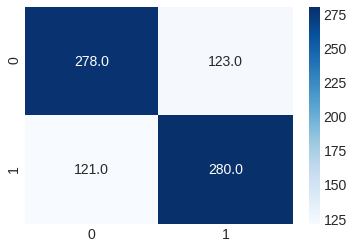

In [3]:
scores = []

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_res, y_train_res)
pred_logreg = logreg.predict(X_train_res)

cross_val_logreg = cross_val_score(
        logreg,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "balanced_accuracy"
    )

scores.append(cross_val_logreg.mean())

print(classification_report(y_train_res, pred_logreg))
print(f"Cross-validation scores: {cross_val_logreg}")

cf = confusion_matrix(y_train_res, pred_logreg)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### KNN

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       401
           1       0.82      0.67      0.74       401

    accuracy                           0.76       802
   macro avg       0.77      0.76      0.76       802
weighted avg       0.77      0.76      0.76       802

Cross-validation scores: [0.63904321 0.57183642 0.55       0.675      0.6875    ]


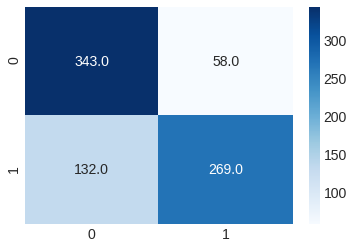

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_res, y_train_res)
pred_knn = knn.predict(X_train_res)

cross_val_knn = cross_val_score(
        knn,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "balanced_accuracy"
    )

scores.append(cross_val_knn.mean())

print(classification_report(y_train_res, pred_knn))
print(f"Cross-validation scores: {cross_val_knn}")

cf = confusion_matrix(y_train_res, pred_knn)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Naive Bayes

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       401
           1       0.63      0.62      0.63       401

    accuracy                           0.63       802
   macro avg       0.63      0.63      0.63       802
weighted avg       0.63      0.63      0.63       802

Cross-validation scores: [0.55825617 0.62145062 0.43125    0.6125     0.6875    ]


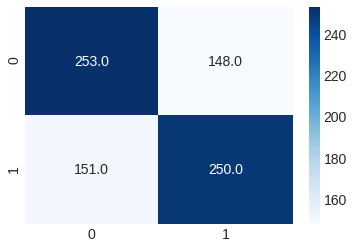

In [5]:
nb = BernoulliNB()

nb.fit(X_train_res, y_train_res)
pred_nb = nb.predict(X_train_res)

cross_val_nb = cross_val_score(
        nb,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "balanced_accuracy"
    )

scores.append(cross_val_nb.mean())
print(classification_report(y_train_res, pred_nb))
print(f"Cross-validation scores: {cross_val_nb}")

cf = confusion_matrix(y_train_res, pred_nb)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### SVM: linear and rbf

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       401
           1       0.70      0.73      0.71       401

    accuracy                           0.71       802
   macro avg       0.71      0.71      0.71       802
weighted avg       0.71      0.71      0.71       802

Cross-validation scores: [0.65285494 0.54606481 0.44375    0.79375    0.7625    ]


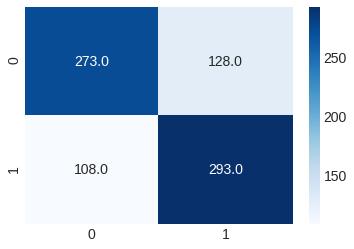

In [6]:
lin_svm = LinearSVC(max_iter = 5000)

lin_svm.fit(X_train_res, y_train_res)
pred_lin_svm = lin_svm.predict(X_train_res)

cross_val_lin_svm = cross_val_score(
        lin_svm,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "balanced_accuracy"
    )

scores.append(cross_val_lin_svm.mean())
print(classification_report(y_train_res, pred_lin_svm))
print(f"Cross-validation scores: {cross_val_lin_svm}")

cf = confusion_matrix(y_train_res, pred_lin_svm)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       401
           1       0.79      0.75      0.77       401

    accuracy                           0.77       802
   macro avg       0.77      0.77      0.77       802
weighted avg       0.77      0.77      0.77       802

Cross-validation scores: [0.64675926 0.61450617 0.44375    0.76875    0.7625    ]


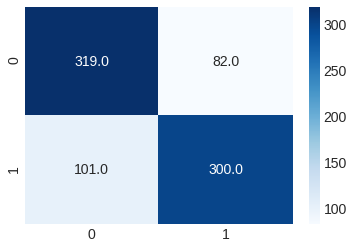

In [7]:
rbf_svm = SVC(kernel='rbf', gamma = "scale")

rbf_svm.fit(X_train_res, y_train_res)
pred_rbf_svm = rbf_svm.predict(X_train_res)

cross_val_rbf_svm = cross_val_score(
        rbf_svm,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "balanced_accuracy"
    )

scores.append(cross_val_rbf_svm.mean())
print(classification_report(y_train_res, pred_rbf_svm))
print(f"Cross-validation scores: {cross_val_rbf_svm}")

cf = confusion_matrix(y_train_res, pred_rbf_svm)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       401

    accuracy                           1.00       802
   macro avg       1.00      1.00      1.00       802
weighted avg       1.00      1.00      1.00       802

Mean of cross-validation scores: [0.76381173 0.61466049 0.56875    0.7        0.76875   ]


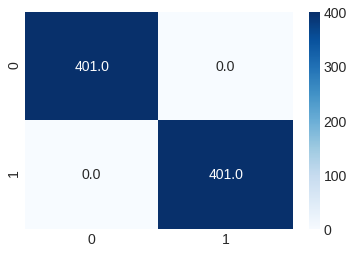

In [8]:
rfc = RandomForestClassifier()

rfc.fit(X_train_res, y_train_res)
pred_rfc = rfc.predict(X_train_res)

cross_val_rfc = cross_val_score(
        rfc,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "balanced_accuracy"
    )

scores.append(cross_val_rfc.mean())
print(classification_report(y_train_res, pred_rfc))
print(f"Mean of cross-validation scores: {cross_val_rfc}")

cf = confusion_matrix(y_train_res, pred_rfc)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### XGBoost

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       401
           1       0.98      0.98      0.98       401

    accuracy                           0.98       802
   macro avg       0.98      0.98      0.98       802
weighted avg       0.98      0.98      0.98       802

Mean of cross-validation scores: [0.72067901 0.60231481 0.6        0.725      0.7       ]


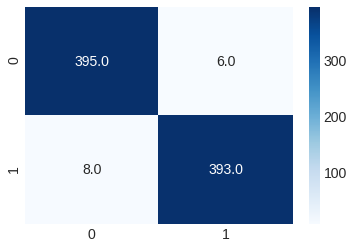

In [9]:
xgb = XGBClassifier()

xgb.fit(X_train_res, y_train_res)
pred_xgb = xgb.predict(X_train_res)

cross_val_xgb = cross_val_score(
        xgb,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "balanced_accuracy"
    )

scores.append(cross_val_xgb.mean())
print(classification_report(y_train_res, pred_xgb))
print(f"Mean of cross-validation scores: {cross_val_xgb}")

cf = confusion_matrix(y_train_res, pred_xgb)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Cat Boost

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       401
           1       0.91      0.84      0.87       401

    accuracy                           0.88       802
   macro avg       0.88      0.88      0.88       802
weighted avg       0.88      0.88      0.88       802

Mean of cross-validation scores: [0.72685185 0.60239198 0.55625    0.73125    0.8125    ]


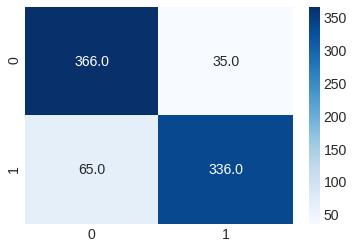

In [10]:
cat = CatBoostClassifier(verbose = False)

cat.fit(X_train_res, y_train_res)
pred_cat = cat.predict(X_train_res)

cross_val_cat = cross_val_score(
        cat,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "balanced_accuracy"
    )

scores.append(cross_val_cat.mean())
print(classification_report(y_train_res, pred_cat))
print(f"Mean of cross-validation scores: {cross_val_cat}")

cf = confusion_matrix(y_train_res, pred_cat)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Comparison of baseline models

The highest score is: 0.6858487654320987 from the model: cat.


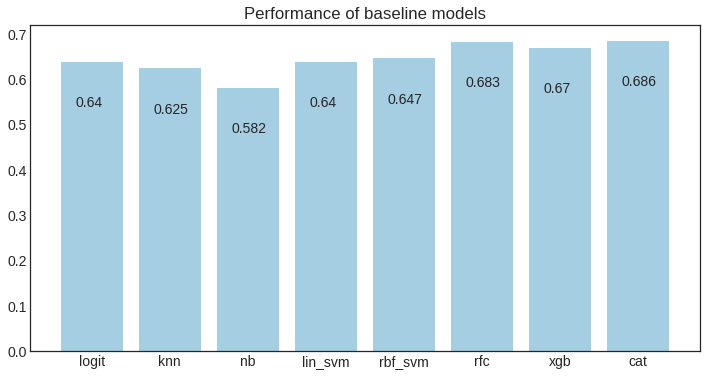

In [11]:
models = ["logit", "knn", "nb", "lin_svm", "rbf_svm", "rfc", "xgb", "cat"]

fig, ax = plt.subplots(figsize = (12, 6))
plt.bar(models, scores, color = colors[0]);
for index, data in enumerate(scores):
    plt.text(x = index - 0.21, y = data - 0.1, s = f"{round(data, 3)}", fontdict=dict(fontsize=14))
plt.title("Performance of baseline models");
print(
    f"The highest score is: {np.max(scores)} from the model: {models[scores.index(np.max(scores))]}."
)

The three ensemble models Random Forest, XGBoost and Cat Boost achieve the best performance. Since the results are similar and Cat Boost requires a lot of computational power, it is best to continue with the fine-tuning of the Random Forest Classifier.

In [12]:
filename = 'models/rfc_model.sav'
pickle.dump(rfc, open(filename, 'wb'))